# Construire et entraîner un perceptron multi-couches - étape par étape

Dans ce TP, vous allez mettre en œuvre l'entraînement d'un réseau de neurones (perceptron multi-couches) à l'aide de la librairie [**`numpy`**](https://numpy.org/). Pour cela nous allons procéder par étapes successives. Dans un premier temps (TP1) nous allons traiter le cas d'un perceptron mono-couche, en commençant par la passe *forward* de prédiction d'une sortie à partir d'une entrée et des paramètres du perceptron, puis en implémentant la passe *backward* de calcul des gradients de la fonction objectif par rapport aux paramètrès. A partir de là, nous pourrons tester l'entraînement à l'aide de la descente de gradient stochastique.

Une fois ces étapes achevées (TP2), nous pourrons nous atteler à la construction d'un perceptron multi-couches, qui consistera pour l'essentiel en la composition de perceptrons mono-couche. 

Dans ce qui suit, nous adoptons les conventions de notation suivantes : 

- $(x, y)$ désignent un couple donnée/label de la base d'apprentissage ; $\hat{y}$ désigne quant à lui la prédiction du modèle sur la donnée $x$.

- L'indice $i$ indique la $i^{\text{ème}}$ dimension d'un vecteur.

- L'exposant $[l]$ désigne un objet associé à la $l^{\text{ème}}$ couche.

- L'exposant $(k)$ désigne un objet associé au $k^{\text{ème}}$ exemple. 
   
Exemple:  
- $a^{(2)[3]}_5$ indique la 5ème dimension du vecteur d'activation du 2ème exemple d'entraînement (2), de la 3ème couche [3].


Commençons par importer tous les modules nécessaires : 

In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn import datasets


--- 

## Perceptron mono-couche (TP1)


### Perceptron mono-couche - passe *forward*

Un perceptron mono-couche est un modèle liant une couche d'entrée (en vert, qui n'effectue pas d'opération) à une couche de sortie. Les neurones des deux couches sont connectés par des liaisons pondérées (les poids synaptiques) $W_{xy}$, et les neurones de la couche de sortie portent chacun un biais additif $b_y$. Enfin, une fonction d'activation $f$ est appliquée à l'issue de ces opérations pour obtenir la prédiction du réseau $\hat{y}$. 

On a donc :

$$\hat{y} = f ( W_{xy} x + b_y )$$ 

On posera pour la suite :
$$ z = W_{xy} x + b_y $$

La figure montre une représentation de ces opérations sous forme de réseau de neurones (Figure 1), mais aussi sous une forme fonctionnelle (Figure 2) qui permet de bien visualiser l'ordre des opérations.

<img src="https://drive.google.com/uc?id=1RZeiaKue0GLXJr3HRtKkuP6GD8r6I1_Q" height=300>
<img src="https://drive.google.com/uc?id=1dnQ6SSdpEX1GDTgoNTrUwA3xjiP9rTYU" height=250>
<!-- <img src="https://docs.google.com/uc?export=download&id=1U4V-MwOatw4axK2u8sJxaasUMl6A3TPo" height=300> -->
<!-- <img src="https://docs.google.com/uc?export=download&id=14tq-pbbFLvBZU-8LGvgYA71vrWNmSK73" height=250> -->

Notez que les paramètres du perceptron, que nous allons ajuster par un processus d'optimisation, sont donc les poids synaptiques $W_{xy}$ et les biais $b_y$. Par commodité dans le code, nous considérerons également comme un paramètre le choix de la fonction d'activation.

**Remarque importante** : on a ici simplifié les dimensions des tenseurs en considérant que les données étaient prédites une à une par le perceptron. En pratique, on traite souvent les données par *batch*, c'est-à-dire que les prédictions sont faites pour plusieurs données simultanément. Ici pour une taille de *batch* de $m$, cela signifie en fait que :
 
$$ x \in \mathbb{R}^{4 \times m} \quad\text{et}\quad y \in \mathbb{R}^{5 \times m}$$ 


Complétez la fonction `dense_layer_forward` qui calcule la prédiction  d'un perceptron mono-couche pour une entrée $x$. 

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
def dense_layer_forward(x, Wxy, by, activation):
    """
    Réalise une unique étape forward de la couche dense telle que décrite dans la figure (2)

    Arguments:
    x -- l'entrée, tableau numpy de dimension (n_x, m).
    Wxy -- Matrice de poids multipliant l'entrée, tableau numpy de shape (n_y, n_x)
    by -- Biais additif ajouté à la sortie, tableau numpy de dimension (n_y, 1)
    activation -- Chaîne de caractère désignant la fonction d'activation choisie : 'linear', 'sigmoid' ou 'relu'

    Retourne :
    y_pred -- prédiction, tableau numpy de dimension (n_y, m)
    cache -- tuple des valeurs utiles pour la passe backward (rétropropagation du gradient), contient (x, z)
    """

    ### A COMPLETER ### 
    # calcul de z
    z = Wxy @ x + by
    # calcul de la sortie en appliquant la fonction d'activation
    if activation == 'relu':
        y = np.maximum(z, 0)
    elif activation == 'sigmoid':
        y = sigmoid(z)
    elif activation == 'linear':
        y = z
    else:
        raise NotImplemented("Erreur : la fonction d'activation n'est pas implémentée.")

    # sauvegarde du cache pour la passe backward
    cache = (x, z)

    return y, cache

Exécutez les lignes suivantes pour vérifier la validité de votre code :

In [11]:
np.random.seed(1)

x_tmp = np.random.randn(3,10)
Wxy = np.random.randn(2,3)
by = np.random.randn(2,1)

activation = 'relu'
y_pred_tmp, _ = dense_layer_forward(x_tmp, Wxy, by, activation)

print("y_pred.shape = \n", y_pred_tmp.shape)

print('----------------------------')

print("y_pred[1] =\n", y_pred_tmp[1])

print('----------------------------')

activation = 'sigmoid'
y_pred_tmp, _ = dense_layer_forward(x_tmp, Wxy, by, activation)
print("y_pred[1] =\n", y_pred_tmp[1])

print('----------------------------')

activation = 'linear'
y_pred_tmp, _ = dense_layer_forward(x_tmp, Wxy, by, activation)
print("y_pred[1] =\n", y_pred_tmp[1])

y_pred.shape = 
 (2, 10)
----------------------------
y_pred[1] =
 [0.         2.11983968 0.88583246 1.39272594 0.         2.92664609
 0.         1.47890228 0.         0.04725575]
----------------------------
y_pred[1] =
 [0.10851642 0.89281659 0.70802939 0.80102707 0.21934644 0.94914804
 0.24545321 0.81440672 0.48495927 0.51181174]
----------------------------
y_pred[1] =
 [-2.10598556  2.11983968  0.88583246  1.39272594 -1.26947904  2.92664609
 -1.12301093  1.47890228 -0.06018107  0.04725575]


**Affichage attendu**: 
```Python
y_pred.shape = 
 (2, 10)
----------------------------
y_pred[1] =
 [0.         2.11983968 0.88583246 1.39272594 0.         2.92664609
 0.         1.47890228 0.         0.04725575]
----------------------------
y_pred[1] =
 [0.10851642 0.89281659 0.70802939 0.80102707 0.21934644 0.94914804
 0.24545321 0.81440672 0.48495927 0.51181174]
----------------------------
y_pred[1] =
 [-2.10598556  2.11983968  0.88583246  1.39272594 -1.26947904  2.92664609
 -1.12301093  1.47890228 -0.06018107  0.04725575]

```

### Perceptron mono-couche - passe *backward*

Dans les librairies d'apprentissage profond actuelles, il suffit d'implémenter la passe *forward*, et la passe *backward* est réalisée automatiquement, avec le calcul des gradients (différentiation automatique) et la mise à jour des paramètres. Il est cependant intéressant de comprendre comment fonctionne la passe *backward*, en l'implémentant sur un exemple simple.

<!-- <img src="https://drive.google.com/uc?id=1MC8Nxu6BQnpB7cGLwunIbgx9s1FaGw81" height=350> -->
<!-- <img src="https://docs.google.com/uc?export=download&id=1bIk-7GppJzkP2HNJ9RMvhjPoBNuNX-yU" height=350> -->

Il faut calculer les dérivées par rapport à la fonction de perte pour ensuite mettre à jour les paramètres du réseau. Les équations de rétropropagation sont données ci-dessous (c'est un bon exercice que de les calculer à la main). 

\begin{align}
\displaystyle  {dW_{xy}} &~=~ \frac{\partial J}{\partial W_{xy}} ~=~ \ldots ~=~ dz \cdot x^{T}\tag{1} \\[8pt]
\displaystyle db_{y} &~=~ \frac{\partial J}{\partial b_y} ~=~ \ldots ~=~ \sum_{batch}dz\tag{2} \\[8pt]
\displaystyle dx &~=~ \frac{\partial J}{\partial x} ~=~ \ldots ~=~ { W_{xy}}^T \cdot dz \tag{3}  \\[8pt]
\end{align}


Ici, $\cdot$ indique une multiplication matricielle tandis que $\times$ indique une multiplication élément par élément. Par ailleurs :
* $\texttt{dz}$ désigne $\frac{\partial J}{\partial z}=\frac{\partial J}{\partial \hat{y}}\times\frac{\partial \hat{y}}{\partial z}$, 
* $\texttt{dWxy}$ désigne $\frac{\partial J}{\partial W_{xy}}$, 
* $\texttt{dby}$ désigne $\frac{\partial J}{\partial b_y}$, et 
* $\texttt{dx}$ désigne $\frac{\partial J}{\partial x}$.

Ces noms ont été choisis pour être utilisables dans le code. On notera également $\texttt{dy\_dz}$ pour $\frac{\partial\hat{y}}{\partial z}$ et $\texttt{dy\_hat}$ pour $\frac{\partial J}{\partial\hat{y}}$.

In [20]:
def dense_layer_backward(dy_hat, Wxy, by, activation, cache):
    """
    Implémente la passe backward de la couche dense.

    Arguments :
    dy_hat -- Gradient de la perte J par rapport à la sortie ŷ
    cache -- dictionnaire python contenant des variables utiles (issu de dense_layer_forward())

    Retourne :
    gradients -- dictionnaire python contenant les gradients suivants :
                        dx -- Gradients par rapport aux entrées, de dimension (n_x, m)
                        dby -- Gradients par rapport aux biais, de dimension (n_y, 1)
                        dWxy -- Gradients par rapport aux poids synaptiques Wxy, de dimension (n_y, n_x)
    """
    
    # Récupérer le cache
    (x, z) = cache

    ### A COMPLETER ###   
    # calcul de la sortie en appliquant l'activation
    # dy_dz -- Gradient de la sortie ŷ par rapport à l'état caché z
    if activation == 'relu':
        dy_dz = np.maximum(z, 0)/z
    elif activation == 'sigmoid':
        dy_dz = np.exp(-z)/(1+np.exp(-z))**2
    elif activation == 'linear':
        # dy_dz = np.identity(z.shape[0])
        dy_dz = np.ones_like(z)
    else:
        raise NotImplemented("Erreur : la fonction d'activation n'est pas implémentée.")

    dz = dy_hat * dy_dz
    # calculer le gradient de la perte par rapport à x
    dx = Wxy.T @ dz  

    # calculer le gradient de la perte par rapport à Wxy
    dWxy = dz @ x.T 

    # calculer le gradient de la perte par rapport à by 
    dby = np.sum(dz, axis=1) 

    ### FIN ###
    
    # Stocker les gradients dans un dictionnaire
    gradients = {"dx": dx, "dby": dby, "dWxy": dWxy}
    
    return gradients

On peut maintenant créer une classe `DenseLayer`, qui comprend en attribut toutes les informations nécessaires à la description d'une couche dense, c'est-à-dire : 

*   Le nombre de neurones en entrée de la couche dense ($\texttt{input\_size}$)
*   Le nombre de neurones en sortie de la couche dense ($\texttt{output\_size}$)
*   La fonction d'activation choisie sur cette couche ($\texttt{activation}$)
*   Les poids synaptiques de la couche dense, stockés dans une matrice de taille ($\texttt{out\_size}$, $\texttt{input\_size}$) : $\texttt{Wxy}$
*   Les biais de la couche dense, stockés dans un vecteur de taille ($\texttt{output\_size}$, 1) : $\texttt{b}y$

On ajoute également un attribut cache qui permettra de stocker les entrées de la couche dense ($\texttt{x}$) ainsi que les calculs intermédiaires ($\texttt{z}$) réalisés lors de la passe *forward*, afin d'être réutilisés pour la basse *backward*.

A vous de compléter les 4 jalons suivants : 

*   **L'initialisation des paramètres** $\texttt{Wxy}$ et $\texttt{by}$ : $\texttt{Wxy}$ doit être positionnée suivant [l'initialisation de Glorot](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotUniform), et $\texttt{by}$ est initialisée par un vecteur de zéros.
*   **La fonction `forward`**, qui consiste simplement en un appel de la fonction `dense_layer_forward` implémentée précédemment.
*   **La fonction `backward`**, qui consiste simplement en un appel de la fonction `dense_layer_backward` implémentée précédemment.
*   Et enfin **la fonction `update_parameters`** qui applique la mise à jour de la descente de gradient en fonction d'un taux d'apprentissage (learning_rate) et des gradients calculés dans la passe *forward*.

In [36]:
class DenseLayer:
    def __init__(self, input_size, output_size, activation):
        self.input_size = input_size
        self.output_size = output_size
        self.activation = activation
        self.cache = None  # Le cache sera mis à jour lors de la passe forward
        
        ### A COMPLETER ###
        limit = math.sqrt(6 / (input_size + output_size))
        self.Wxy = np.random.uniform(-limit, limit, (output_size, input_size)) # https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotUniform
        self.by = np.zeros(output_size)

    def forward(self, x_batch):
        y, cache = dense_layer_forward(x_batch, self.Wxy, self.by, self.activation)
        self.cache = cache
        return y

    def backward(self, dy):
        return dense_layer_backward(dy, self.Wxy, self.by, self.activation, self.cache)

    def update_parameters(self, gradients, learning_rate):
        self.Wxy -= gradients["dWxy"] * learning_rate
        self.by  -= gradients["dby"] * learning_rate

### Entraînement par descente de gradient stochastique

Pour entraîner notre modèle, nous devons mettre en place un optimiseur. Nous implémenterons la descente de gradient stochastique avec mini-batch. Il nous faut cependant au préalable implanter la fonction de coût que nous utiliserons pour évaluer la qualité de nos prédictions. 

Pour le moment, nous allons nous contenter d'une erreur quadratique moyenne, qui associée à une fonction d'activation linéaire (l'identité) permet de résoudre les problèmes de régression. 

La fonction de coût prend en entrée deux paramètres : la vérité-terrain $\texttt{y\_true}$ et la prédiction du modèle $\texttt{y\_pred}$. Ces deux matrices sont de dimension $\texttt{bs}\times\texttt{output\_size}$. La fonction retourne deux grandeurs : $\texttt{loss}$ qui correspond à l'erreur quadratique moyenne des prédictions par rapport aux vérités-terrains, et $\texttt{grad}$ au gradient de l'erreur quadratique moyenne par rapport aux prédictions. Autrement dit : 
$$ \text{grad}  = \frac{\partial J_{mb}}{\partial \hat{y}}$$

où $\hat{y}$ correspond à $\texttt{y\_pred}$, et $J_{mb}$ à la fonction objectif calculée sur un mini-batch $mb$ de données.

In [50]:
### A COMPLETER ###

def mean_square_error(y_true, y_pred):
    loss = np.mean((y_pred - y_true)**2, axis=(0,1))
    grad = 2 * (y_pred - y_true) / y_true.size
    return loss, grad

La descente de gradient stochastique prend en entrée les paramètres suivants :  
*    $\texttt{x\_train}$ et $\texttt{y\_train}$ respectivement les données et labels de l'ensemble d'apprentissage (que l'on suppose de taille $N$).
*    $\texttt{model}$ une instance du modèle que l'on veut entraîner (qui doit implanter les 3 fonctions vues précédemment $\texttt{forward}$, $\texttt{backward}$ et $\texttt{update\_parameters}$).
*    $\texttt{loss\_function}$ peut prendre deux valeurs : '$\texttt{mse}$' (erreur quadratique moyenne) ou '$\texttt{bce}$' (entropie croisée binaire, que nous implémenterons par la suite).
*    $\texttt{learning\_rate}$ le taux d'apprentissage choisi pour la descente de gradient.
*    $\texttt{epochs}$ le nombre de parcours complets de l'ensemble d'apprentissage que l'on veut réaliser.
*    $\texttt{batch\_size}$ la taille de mini-batch désirée pour la descente de gradient stochastique. 

L'algorithme à implémenter est rappelé ci-dessous :       
```
N_batch = floor(N/batch_size)

Répéter epochs fois

  Pour b de 1 à N_batch Faire

    Sélectionner les données x_train_batch et labels y_train_batch du b-ème mini-batch
    Calculer la prédiction y_pred_batch du modèle pour ce mini-batch
    Calculer la perte batch_loss et le gradient de la perte batch_grad par rapport aux prédictions sur ce mini-batch
    Calculer les gradients de la perte par rapport à chaque paramètre du modèle
    Mettre à jour les paramètres du modèle 

  Fin Pour

Fin Répéter

```
Deux remarques additionnelles :    
1. A chaque *epoch*, les *mini-batches* doivent être différents (les données doivent être réparties dans différents *mini-batches*).
2. Il est intéressant de calculer (et d'afficher !) la perte moyennée sur l'ensemble d'apprentissage à chaque *epoch*. Pour cela, on peut accumuler les pertes de chaque *mini-batch* sur une *epoch* et diviser l'ensemble par le nombre de *mini-batches*.

In [54]:
def SGD(x_train, y_train, model, loss_function, learning_rate, epochs, batch_size):
    # Nombre de batches par epoch
    nb_batches = math.floor(x_train.shape[1] / batch_size)

    # Pour gérer le tirage aléatoire des batches parmi les données d'entraînement, 
    # Génération et permutation des indices
    indices = np.arange(x_train.shape[1])
    np.random.shuffle(indices)

    ### A COMPLETER ###

    for e in range(epochs):

        running_loss = 0

        for b in range(nb_batches):

            # Sélection des données du batch courant
            x_train_batch = x_train[:,indices[b*batch_size:(b+1)*batch_size]] 
            y_train_batch = y_train[indices[b*batch_size:(b+1)*batch_size]] 

            # Prédiction du modèle pour le batch courant
            y_pred_batch = model.forward(x_train_batch)

            # Calcul de la perte et des gradients sur le batch courant
            if loss_function == 'mse':
                batch_loss, batch_gradients = mean_square_error(y_train_batch, y_pred_batch)
            elif loss_function == 'bce':
                batch_loss, batch_gradients = binary_cross_entropy(y_train_batch, y_pred_batch)

            running_loss += batch_loss 

            # Calcul du gradient de la perte par rapport aux paramètres du modèle
            param_updates = model.backward(batch_gradients)

            # Mise à jour des paramètres du modèle
            model.update_parameters(param_updates, learning_rate)
        # print(e, running_loss, nb_batches)
        print("Epoch %4d : Loss : %.4f" % (e, float(running_loss/nb_batches)))

        # Nouvelle permutation des données pour la prochaine epoch
        np.random.shuffle(indices)

    return model

### Test sur un problème de régression 

Le bloc de code suivant permet de générer et d'afficher des ensembles de données d'apprentissage et de test pour un problème de régression linéaire classique. 

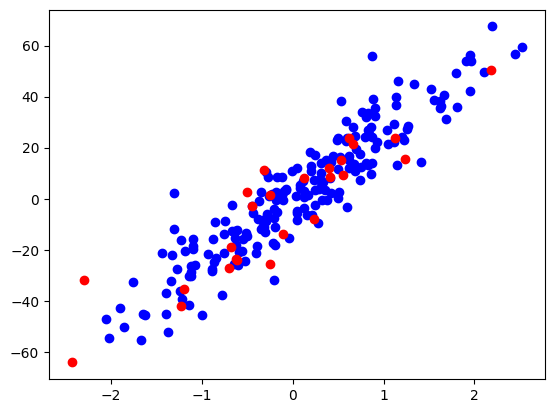

In [58]:
x, y = datasets.make_regression(n_samples=250, n_features=1, n_targets=1, random_state=1, noise=10)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/10, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/9, random_state=1)

x_train, x_val, x_test = x_train.T, x_val.T, x_test.T

### A COMPLETER ###
# Afficher un nuage de points permettant de distinguer "Ensemble d'apprentissage" et "Ensemble de test"
# (par exemple, en traçant l'un en bleu et l'autre en rouge)

fig = plt.figure()
plt.plot(x_train.T, y_train, "ob")
plt.plot(x_test.T, y_test, "or")
plt.show()

Epoch    0 : Loss : 279.0650
Epoch    1 : Loss : 92.2311
Epoch    2 : Loss : 89.0696
Epoch    3 : Loss : 89.2111
Epoch    4 : Loss : 88.5987
Epoch    5 : Loss : 90.2270
Epoch    6 : Loss : 88.5761
Epoch    7 : Loss : 89.4920
Epoch    8 : Loss : 88.2448
Epoch    9 : Loss : 88.4068


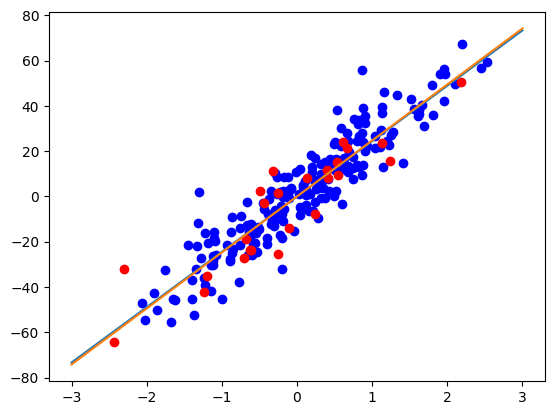

In [66]:
### A COMPLETER ###
input_size = x_train.shape[0]
output_size = 1
activation = 'linear'
model = DenseLayer(input_size, output_size, activation)
model = SGD(x_train, y_train, model, "mse", 1e-1, 10, 20)

# On pourra choisir des batchs de taille 20, pour 10 epochs et un learning-rate de 0.1

# Ajouter la droite de régression linéaire obtenue sur la figure ci-dessus.
plt.figure(fig)
x = np.linspace(-3, 3, 100)
y = x*model.Wxy[0,0]
plt.plot(x, y)
plt.show()

### Test sur un problème de classification binaire

Afin de pouvoir tester notre perceptron mono-couche sur un problème de classification binaire (i.e. effectuer une régression logistique), il est d'abord nécessaire d'implémenter l'entropie croisée binaire.

In [ ]:
### A COMPLETER ###

def binary_cross_entropy(y_true, y_pred):
    loss = ...
    grad =  ...

    return loss, grad

In [ ]:
x, y = datasets.make_blobs(n_samples=250, n_features=2, centers=2, center_box=(- 3, 3), random_state=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/10, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/9, random_state=1)

### A COMPLETER ###
# Proposer une figure permetant de distinguer "Enssemble d'apprentissage" et "Ensemble de test", 
# ainsi que les différentes classes.

[...]

In [ ]:
### A COMPLETER ###
model = DenseLayer(...)
model = SGD(...)
# On pourra choisir des batchs de taille 20, pour 50 epochs et un learning-rate de 0.3

# Ajouter la droite permetant de séparer les deux classes, i.e. la droite de régression logistique,
# obtenue sur la figure ci-dessus.

[...]

### Perceptron mono-couche en `keras`

Essayer de retrouver les résultats précédents (régression et classification binaire) en utilisant la librairie [**`keras`**](https://keras.io/)

In [ ]:
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import Dense

#### Retour sur la régression

In [ ]:
x, y = datasets.make_regression(n_samples=250, n_features=1, n_targets=1, random_state=1, noise=10)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/10, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/9, random_state=1)

plt.plot(x_train, y_train, 'b.', label='Ensemble d\'apprentissage')
plt.plot(x_test, y_test, 'r+', label='Ensemble de test')

plt.legend()
plt.show()

In [ ]:
### A COMPLETER ###

[...]